In [39]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.optimize import curve_fit
from scipy.special import voigt_profile

In [66]:
def voigt(x, mu, sigma, gamma, A):
    return A * voigt_profile(x-mu, sigma, gamma)

def bivoigt(x, mu1, sigma1, gamma1, A1, mu2, sigma2, gamma2, A2):
    return voigt(x, mu1, sigma1, gamma1, A1) + voigt(x, mu2, sigma2, gamma2, A2)

def bivoigt_equal(x, mu1, A1, mu2, A2, sigma, gamma):
    return voigt(x, mu1, sigma, gamma, A1) + voigt(x, mu2, sigma, gamma, A2)

#### 400-413-367-275

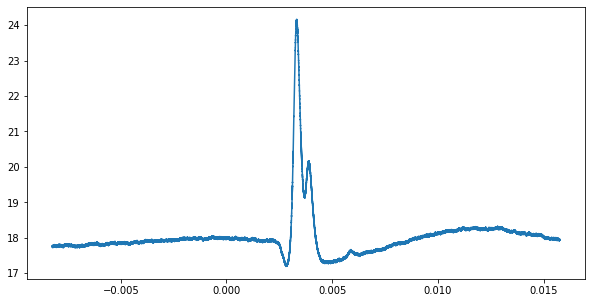

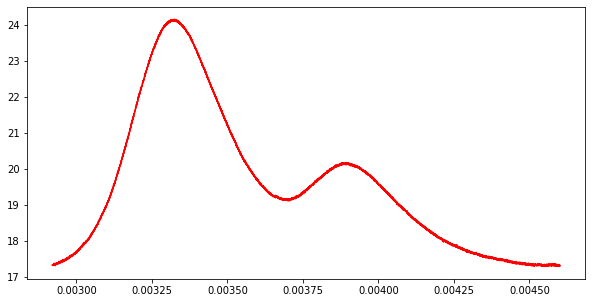

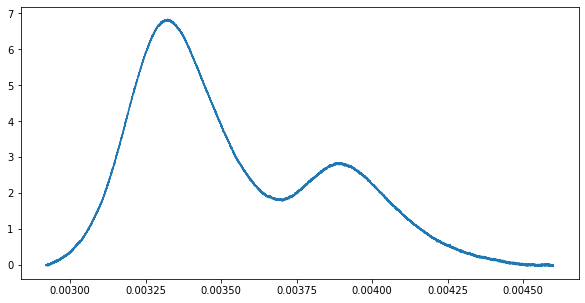

In [139]:
data = pd.read_csv("400.CSV")
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])

plt.figure(figsize=(10,5))
plt.plot(x, y)


a, b = int(len(x)*0.465), int(len(x)*0.535)
x, y = x[a:b], y[a:b]

plt.figure(figsize=(10,5))
plt.plot(x, y, color="red")

k, b = np.polyfit([x[0], x[-1]], [y[0], y[-1]], deg=1)
plt.figure(figsize=(10,5))
x, y = x, y - k*x - b

plt.plot(x, y)

[ 3.33112344e-03  1.50979707e-04 -2.10641208e-05  2.29819993e-03]


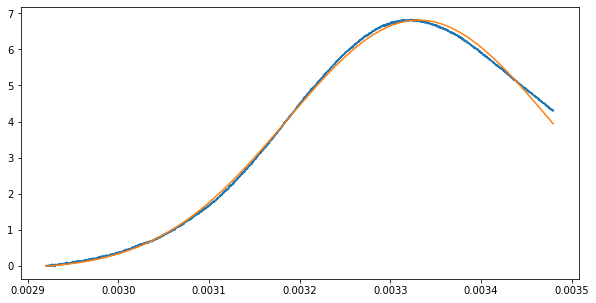

In [72]:
cut = len(x) // 3

plt.figure(figsize=(10, 5))
plt.plot(x[:cut], y[:cut])
x01 = (0.0034, 0.0001, 0.0001, 7)
params1 = curve_fit(voigt, x[:cut], y[:cut], x01)[0]
plt.plot(x[:cut], voigt(x[:cut], *params1))


print(params1)

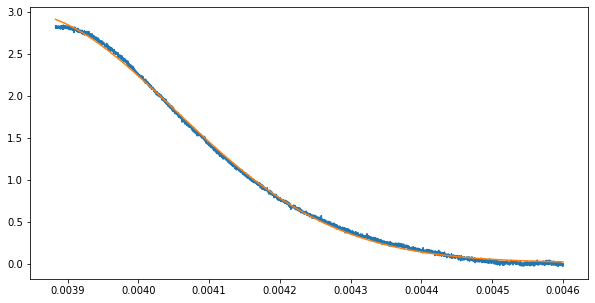

In [75]:
plt.figure(figsize=(10, 5))
shift = 2200

plt.plot(x[cut+shift:], y[cut+shift:])

x02 = (0.004, 0.0001, 0.0001, 3)

params2 = curve_fit(voigt, x[cut+shift:], y[cut+shift:], x02)[0]
plt.plot(x[cut+shift:], voigt(x[cut+shift:], *params2))

[1270.71286527 1011.60093441 1485.29439415  432.37236809   55.90362932
    6.3321115 ]


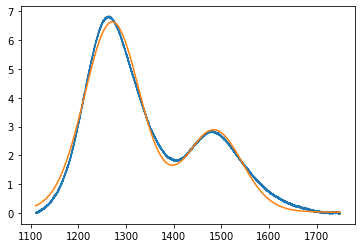

In [76]:
coef = 228.2 / abs(x02[0] - x01[0])

mu1, sigma1, gamma1, A1 = params1 * coef
mu2, sigma2, gamma2, A2 = params2 * coef

A1 /= coef
A2 /= coef

sigma = (sigma1 + sigma2) / 2
gamma = (gamma1 + gamma2) / 2

x *= coef

params = curve_fit(bivoigt_equal, x, y, [mu1, A1, mu2, A2, sigma, gamma])[0]

plt.plot(x, y)
plt.plot(x, bivoigt_equal(x, *params))

print(params)

#### 447-413-367-275

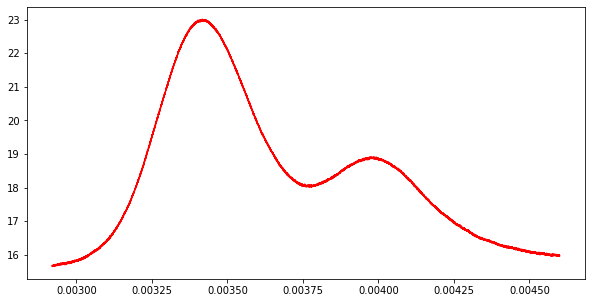

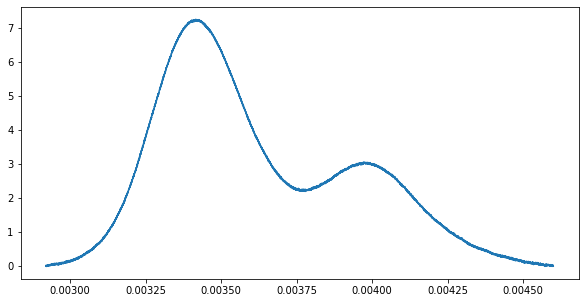

In [78]:
data = pd.read_csv("447.CSV")
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


a, b = int(len(x)*0.465), int(len(x)*0.535)
x, y = x[a:b], y[a:b]

plt.figure(figsize=(10,5))
plt.plot(x, y, color="red")

k, b = np.polyfit([x[0], x[-1]], [y[0], y[-1]], deg=1)
plt.figure(figsize=(10,5))
x, y = x, y - k*x - b

plt.plot(x, y)

[3.41640058e-03 1.44099094e-04 3.35425047e-06 2.66869235e-03]


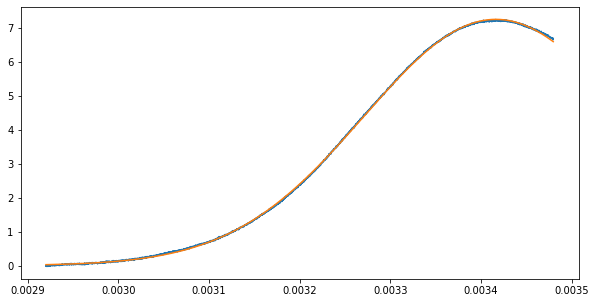

In [79]:
cut = len(x) // 3

plt.figure(figsize=(10, 5))
plt.plot(x[:cut], y[:cut])
x01 = (0.0034, 0.0001, 0.0001, 7)
params1 = curve_fit(voigt, x[:cut], y[:cut], x01)[0]
plt.plot(x[:cut], voigt(x[:cut], *params1))

print(params1)

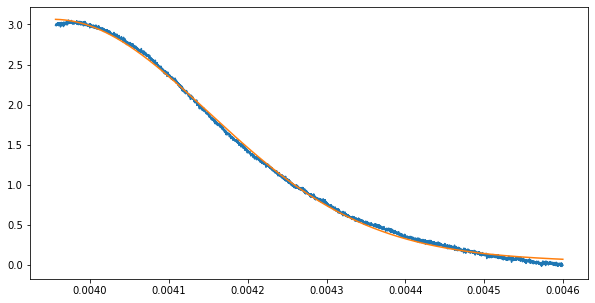

In [83]:
plt.figure(figsize=(10, 5))
shift = 2600

plt.plot(x[cut+shift:], y[cut+shift:])

x02 = (0.004, 0.0001, 0.0001, 3)

params2 = curve_fit(voigt, x[cut+shift:], y[cut+shift:], x02)[0]
plt.plot(x[cut+shift:], voigt(x[cut+shift:], *params2))

[1304.32705782 1119.36326145 1516.6862908   483.42387375   59.2397043
    4.64520843]


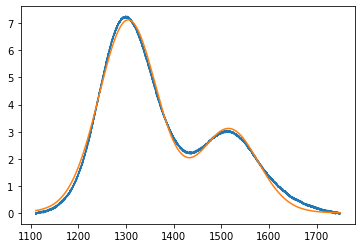

In [84]:
coef = 228.2 / abs(x02[0] - x01[0])

mu1, sigma1, gamma1, A1 = params1 * coef
mu2, sigma2, gamma2, A2 = params2 * coef

A1 /= coef
A2 /= coef

sigma = (sigma1 + sigma2) / 2
gamma = (gamma1 + gamma2) / 2

x *= coef

params = curve_fit(bivoigt_equal, x, y, [mu1, A1, mu2, A2, sigma, gamma])[0]

plt.plot(x, y)
plt.plot(x, bivoigt_equal(x, *params))

print(params)

### 375

[3.36360663e-03 1.34504581e-04 1.13042580e-06 2.21689015e-03]
[3.93286858e-03 1.39728284e-04 6.60803340e-05 1.27497199e-03]


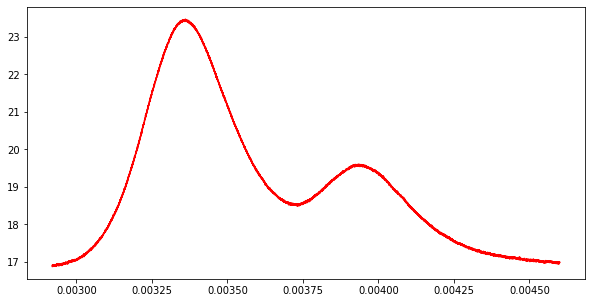

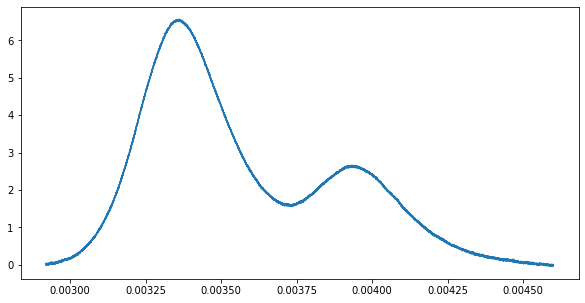

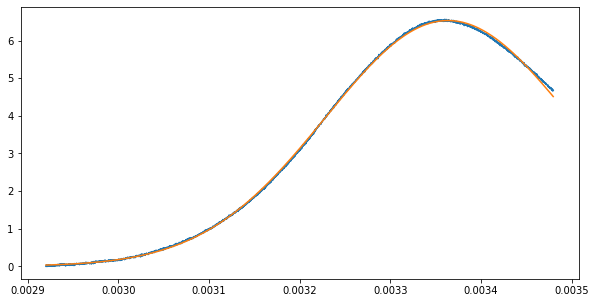

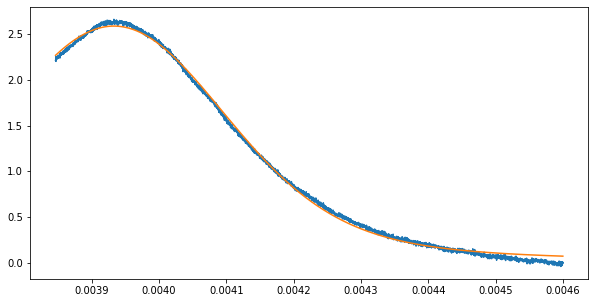

In [97]:
data = pd.read_csv("375.CSV")
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


a, b = int(len(x)*0.465), int(len(x)*0.535)
x, y = x[a:b], y[a:b]

plt.figure(figsize=(10,5))
plt.plot(x, y, color="red")

k, b = np.polyfit([x[0], x[-1]], [y[0], y[-1]], deg=1)
plt.figure(figsize=(10,5))
x, y = x, y - k*x - b

plt.plot(x, y)




cut = len(x) // 3

plt.figure(figsize=(10, 5))
plt.plot(x[:cut], y[:cut])
x01 = (0.0034, 0.0001, 0.0001, 7)
params1 = curve_fit(voigt, x[:cut], y[:cut], x01)[0]
plt.plot(x[:cut], voigt(x[:cut], *params1))

print(params1)



plt.figure(figsize=(10, 5))
shift = 2000

plt.plot(x[cut+shift:], y[cut+shift:])

x02 = (0.004, 0.0001, 0.0001, 3)

params2 = curve_fit(voigt, x[cut+shift:], y[cut+shift:], x02)[0]
print(params2)
plt.plot(x[cut+shift:], voigt(x[cut+shift:], *params2))

[1283.47679615  950.85776068 1499.27186303  394.66435191   52.78409566
    8.80403415]


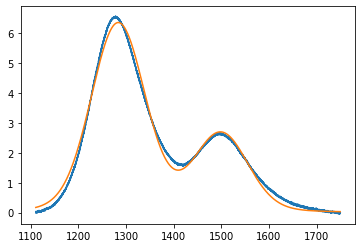

In [98]:
coef = 228.2 / abs(x02[0] - x01[0])

mu1, sigma1, gamma1, A1 = params1 * coef
mu2, sigma2, gamma2, A2 = params2 * coef

A1 /= coef
A2 /= coef

sigma = (sigma1 + sigma2) / 2
gamma = (gamma1 + gamma2) / 2

x *= coef

params = curve_fit(bivoigt_equal, x, y, [mu1, A1, mu2, A2, sigma, gamma])[0]

plt.plot(x, y)
plt.plot(x, bivoigt_equal(x, *params))

print(params)

#### 360

[ 3.31265437e-03  1.44591846e-04 -1.61952205e-05  1.84735872e-03]
[3.88074803e-03 1.56827957e-04 6.41395350e-05 1.18149391e-03]


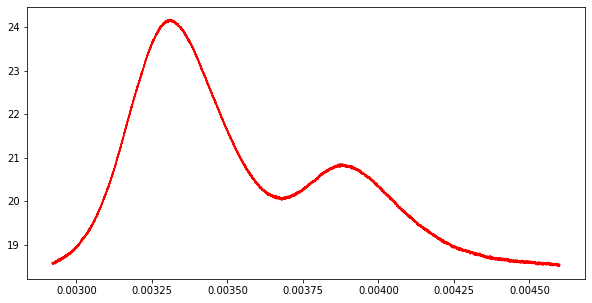

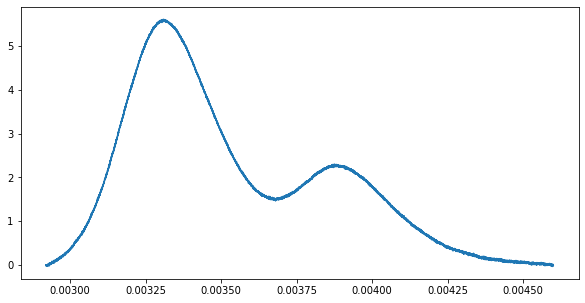

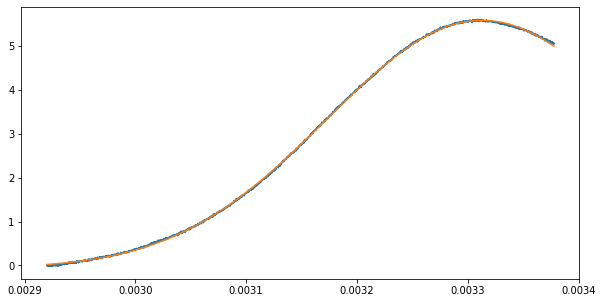

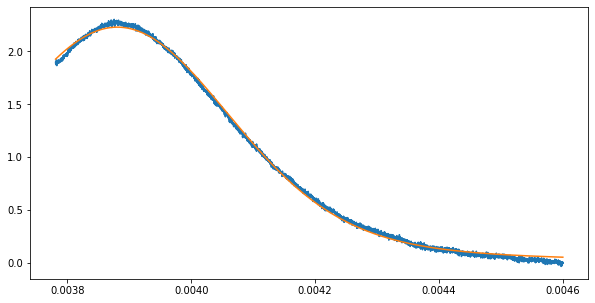

In [119]:
data = pd.read_csv("360.CSV")
x, y = np.array(data.iloc[::, 0]), np.array(data.iloc[::, 1])


a, b = int(len(x)*0.465), int(len(x)*0.535)
x, y = x[a:b], y[a:b]

plt.figure(figsize=(10,5))
plt.plot(x, y, color="red")

k, b = np.polyfit([x[0], x[-1]], [y[0], y[-1]], deg=1)
plt.figure(figsize=(10,5))
x, y = x, y - k*x - b

plt.plot(x, y)


cut = 2500

plt.figure(figsize=(10, 5))
plt.plot(x[:cut], y[:cut])
x01 = (0.0034, 0.0001, 0.0001, 7)
params1 = curve_fit(voigt, x[:cut], y[:cut], x01)[0]
plt.plot(x[:cut], voigt(x[:cut], *params1))

print(params1)



plt.figure(figsize=(10, 5))
shift = 2200

plt.plot(x[cut+shift:], y[cut+shift:])

x02 = (0.004, 0.0001, 0.0001, 3)

params2 = curve_fit(voigt, x[cut+shift:], y[cut+shift:], x02)[0]
print(params2)
plt.plot(x[cut+shift:], voigt(x[cut+shift:], *params2))

[1266.3362853   839.23544035 1482.02014209  353.39180342   56.42090936
    6.33029387]


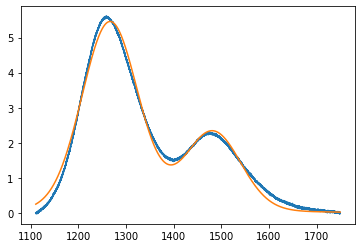

In [120]:
coef = 228.2 / abs(x02[0] - x01[0])

mu1, sigma1, gamma1, A1 = params1 * coef
mu2, sigma2, gamma2, A2 = params2 * coef

A1 /= coef
A2 /= coef

sigma = (sigma1 + sigma2) / 2
gamma = (gamma1 + gamma2) / 2

x *= coef

params = curve_fit(bivoigt_equal, x, y, [mu1, A1, mu2, A2, sigma, gamma])[0]

plt.plot(x, y)
plt.plot(x, bivoigt_equal(x, *params))

print(params)

In [134]:
df_res = pd.DataFrame({"T, K" : [633, 648, 673, 720], "T, C" : [360, 375, 400, 447],"sigma, MHz" : [56.4, 52.8, 55.9, 59.2],
                       "gamma, MHz" : [6.3, 8.8, 6.3, 4.6], "lifetime, ns" : [0, 0, 0, 0],"v_perp, m/s" : [0, 0, 0, 0],
                       "v_z(theor), m/s" : [0, 0, 0, 0], "2tau, mrad" : [0, 0, 0, 0]})

df_res

T, K  T, C  sigma, MHz  gamma, MHz  lifetime, ns  v_perp, m/s  \
0   633   360        56.4         6.3             0            0   
1   648   375        52.8         8.8             0            0   
2   673   400        55.9         6.3             0            0   
3   720   447        59.2         4.6             0            0   

   v_z(theor), m/s  2tau, mrad  
0                0           0  
1                0           0  
2                0           0  
3                0           0

In [137]:
df_res["lifetime, ns"] = round(1 / (2 * np.pi * df_res["gamma, MHz"]) * 1000, 1)

df_res["v_perp, m/s"] = round(671 * 2 ** 0.5 * df_res["sigma, MHz"] * 0.001, 1)

df_res["v_z(theor), m/s"] = round(100 * ((3 * 1.38) / (6.94 * 1.66) * df_res["T, K"]) ** 0.5, 1)

df_res["2tau, mrad"] = round(2000 * df_res["v_perp, m/s"] / df_res["v_z(theor), m/s"])

print("Оптимальный угол: 41mrad")

Оптимальный угол: 41mrad


In [138]:
df_res

T, K  T, C  sigma, MHz  gamma, MHz  lifetime, ns  v_perp, m/s  \
0   633   360        56.4         6.3          25.3         53.5   
1   648   375        52.8         8.8          18.1         50.1   
2   673   400        55.9         6.3          25.3         53.0   
3   720   447        59.2         4.6          34.6         56.2   

   v_z(theor), m/s  2tau, mrad  
0           1508.2        71.0  
1           1526.0        66.0  
2           1555.2        68.0  
3           1608.5        70.0